In [5]:
import pandas as pd
import pygsheets

gc = pygsheets.authorize(service_file="drive/MyDrive/gSheet.json")
url = "https://docs.google.com/spreadsheets/d/16xf0r0qA2UJGa348M8KzfGRdYBtcg1LykduW_WrC0RE/edit#gid=1899414583"

import matplotlib.pyplot as plt
from tqdm import tqdm

import umap.plot as u_plot
import umap.umap_ as umap

u_plot.output_notebook()
tqdm.pandas()

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


# Visualization (UMAP)

In [6]:
import numpy as np

In [7]:
df = pd.read_pickle("drive/MyDrive/embeddings_cleaned.pkl")

In [12]:
df.head(4)

,_id,subject_content_text_cleaned,minilm_embeddings_cleaned
93485,PMOPG/D/2023/0015581,pgrj,"[-0.09041333943605423, 0.013560930266976357, -..."
149941,PMOPG/D/2023/0023231,pgrj,"[-0.09041333943605423, 0.013560930266976357, -..."
137640,DEAID/E/2023/0005953,ट्रांसफर में व्याप्त भ्रष्टाचार छुपाने हेतु से...,"[0.06316458433866501, 0.014884322881698608, -0..."
26768,DOEXP/E/2023/0000087,expenditure pay upgradation anomalies in pay...,"[-0.06277257204055786, -0.006890749093145132, ..."


# Get Data from G sheets

In [8]:
sh = gc.open_by_url(url)

In [9]:
df_1 = sh.worksheet_by_title("Res_18k").get_as_df()
df_2 = sh.worksheet_by_title("Res_15k_part_2").get_as_df()

In [10]:
df_1["org"] = df_1["_id"].progress_apply(lambda r: r.split("/")[0])

100%|██████████| 18000/18000 [00:00<00:00, 732906.89it/s]


In [11]:
df_2["org"] = df_2["_id"].progress_apply(lambda r: r.split("/")[0])

100%|██████████| 15750/15750 [00:00<00:00, 640367.27it/s]


In [12]:
res_1 = pd.merge(df, df_1, on="_id", how="inner")
res_2 = pd.merge(df, df_2, on="_id", how="inner")

In [18]:
res_1

,_id,subject_content_text_cleaned_x,minilm_embeddings_cleaned,subject_content_text_cleaned_y,aggClustering_6900,aggClustering_8100,org
0,PMOPG/E/2023/0025761,dear sir every year at various airports acros...,"[0.015364701859652996, 0.08205529302358627, -0...",dear sir every year at various airports acros...,6893,6893,PMOPG
1,PMOPG/D/2023/0025187,pgdul,"[-0.11682478338479996, -0.064006008207798, -0....",pgdul,1344,671,PMOPG
2,GOVUP/E/2023/0004728,sir please send it to sir additional director ...,"[-0.02602284774184227, -0.03130212798714638, -...",sir please send it to sir additional director ...,92,1457,GOVUP
3,MOLBR/E/2023/0004356,labour and employment pension settlement of ...,"[-0.05061619356274605, -0.0051640840247273445,...",labour and employment pension settlement of ...,605,223,MOLBR
4,PMOPG/E/2023/0011441,प्रार्थिया की आ० गाटा भूमिधरी नम्बरान के विक्र...,"[0.0023809366393834352, 0.041455961763858795, ...",प्रार्थिया की आ० गाटा भूमिधरी नम्बरान के विक्र...,299,1644,PMOPG
...,...,...,...,...,...,...,...
17995,GOVUP/E/2023/0005673,ho nble sir with due respect i want to know th...,"[-0.06807492673397064, 0.017808467149734497, 0...",ho nble sir with due respect i want to know th...,878,1757,GOVUP
17996,MINIT/E/2023/0000490,electronics information technology others o...,"[-0.029013607650995255, 0.029852796345949173, ...",electronics information technology others o...,344,1750,MINIT
17997,DEPOJ/E/2023/0001336,सेवा में\r\nश्रीमान पुलिस अधीक्षक महोदय\r\nथान...,"[0.024631552398204803, 0.018132755532860756, -...",सेवा में\r\nश्रीमान पुलिस अधीक्षक महोदय\r\nथान...,517,1908,DEPOJ
17998,DOAAC/E/2023/0000887,मेरा नाम रामेश्वर कुम्हार है मेरे पिताजी का ना...,"[-0.012947463430464268, -0.013324057683348656,...",मेरा नाम रामेश्वर कुम्हार है मेरे पिताजी का ना...,557,1827,DOAAC


In [13]:
embeddings_1 = np.array([np.array(em) for em in res_1.minilm_embeddings_cleaned])
embeddings_2 = np.array([np.array(em) for em in res_2.minilm_embeddings_cleaned])

In [14]:
embeddings_1.shape, embeddings_2.shape

((18000, 384), (15750, 384))

# For Part 1 (i.e., Res_18k)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


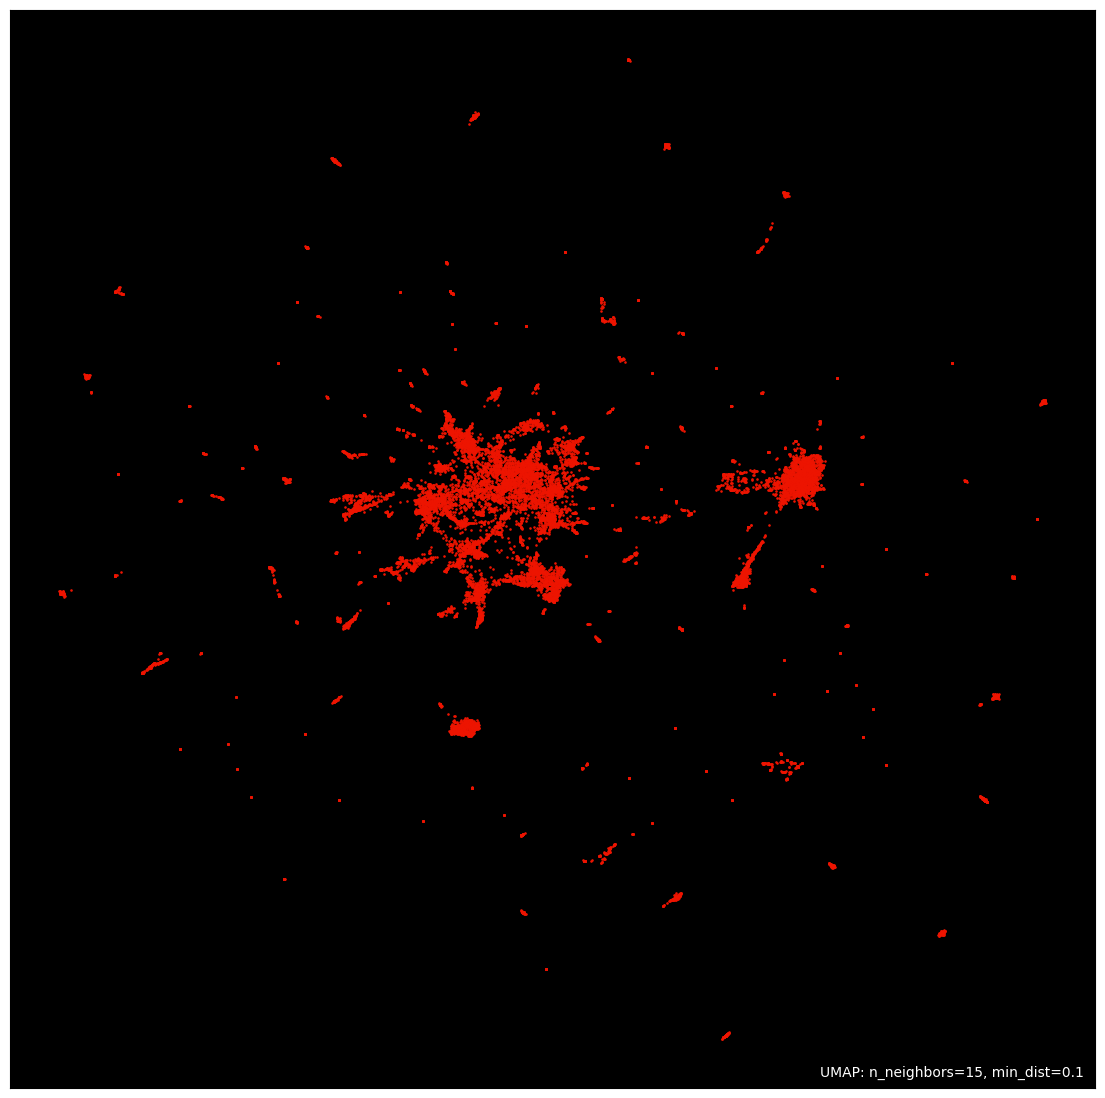

In [21]:
umap_obj = umap.UMAP().fit(embeddings_1)
f = u_plot.points(umap_obj, height=1400, width=1400, theme="fire")
plt.savefig("drive/MyDrive/Res_18k.png")
#u_plot.plt.show()

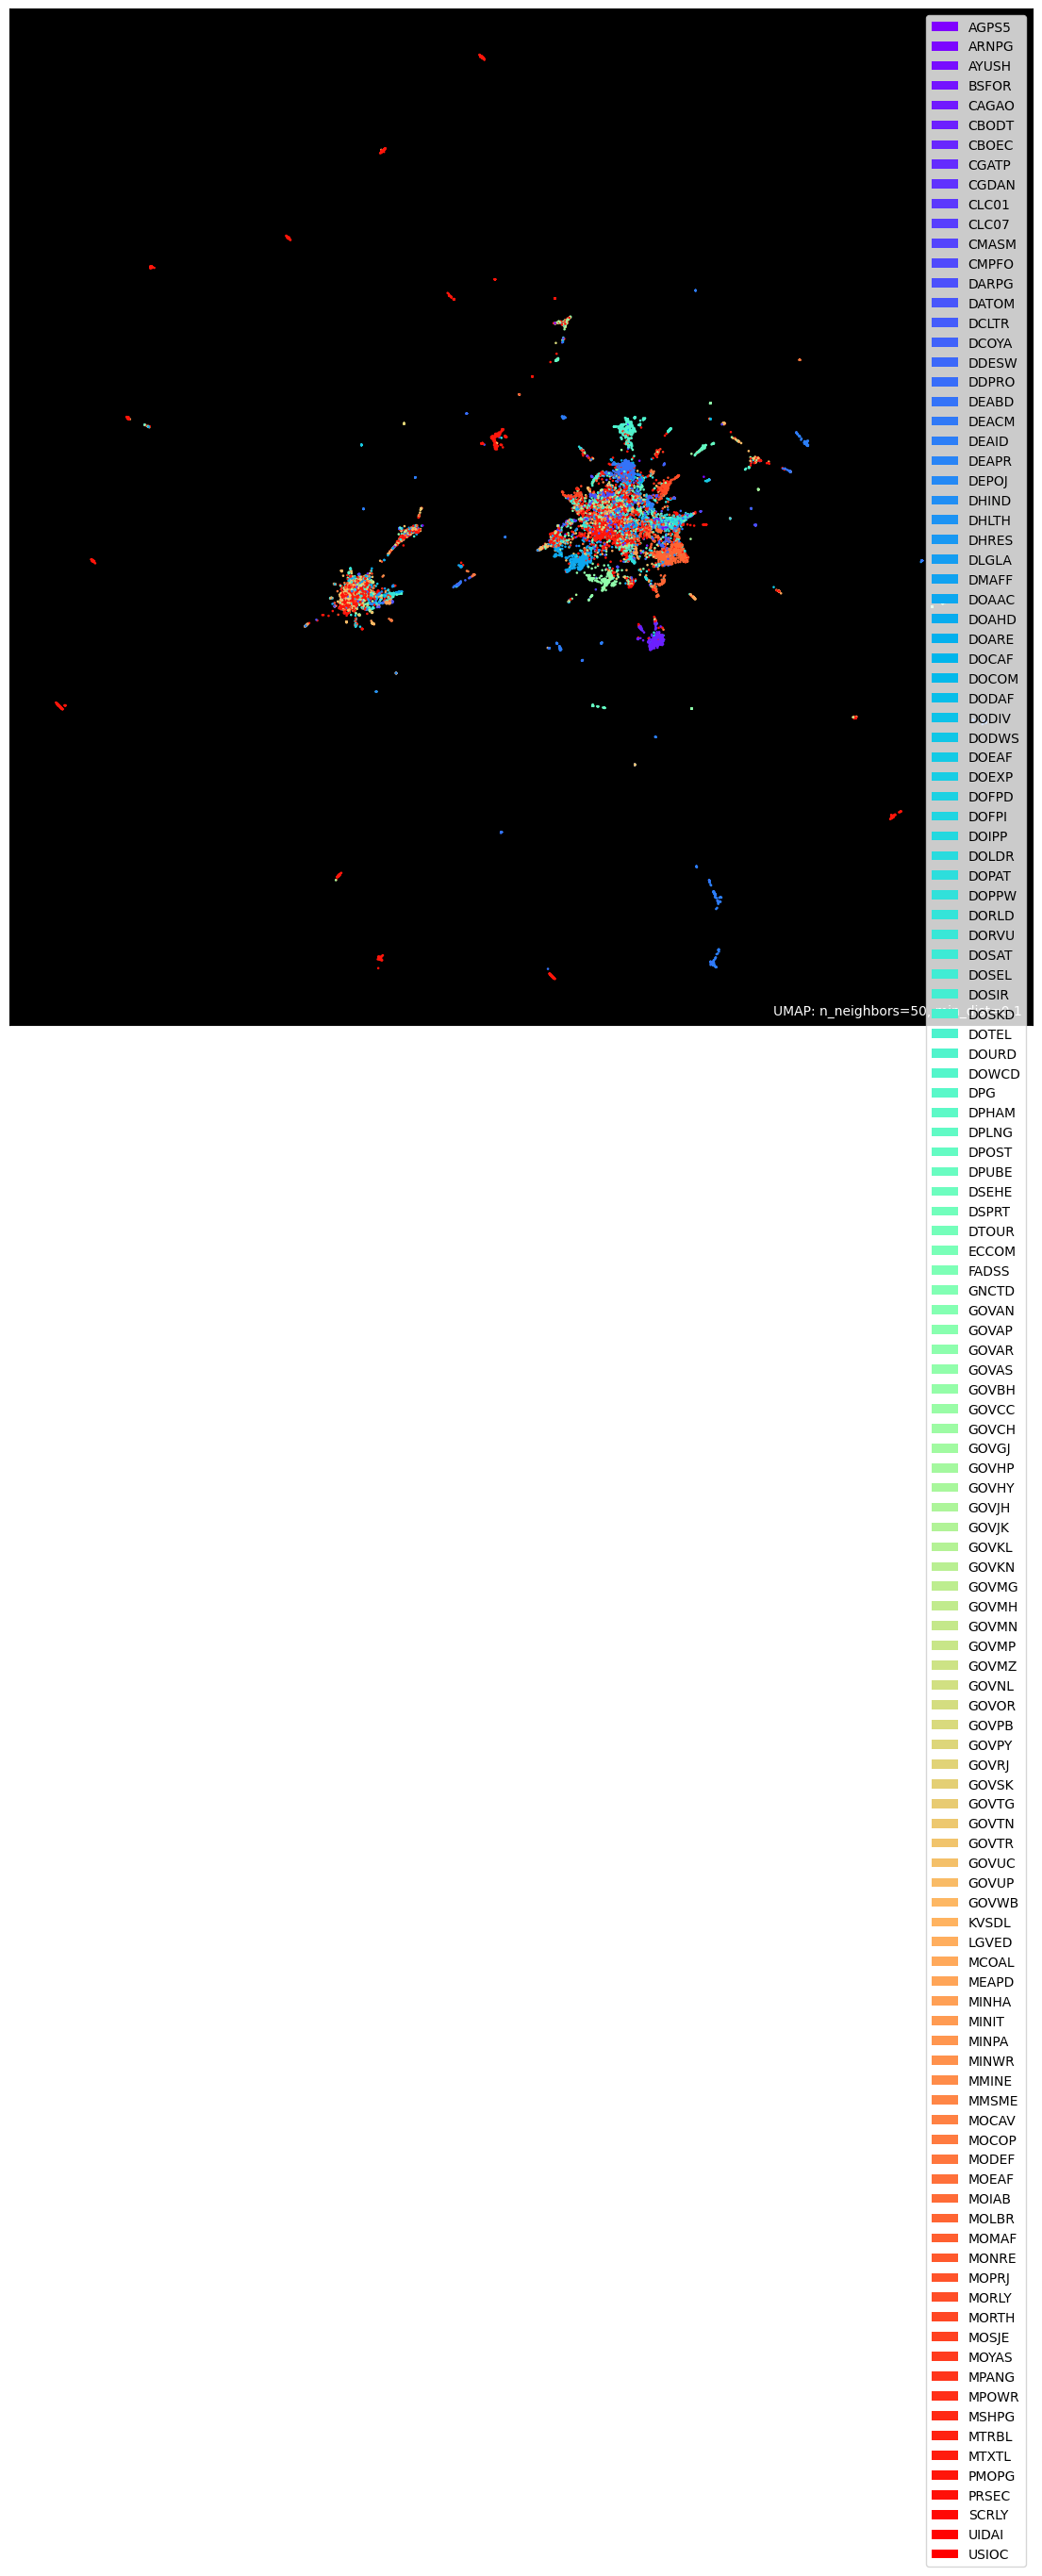

In [19]:
umap_obj = umap.UMAP(n_neighbors=50).fit(embeddings_1)
f = u_plot.points(umap_obj, labels=res_1.org, height=1400, width=1400, theme="fire")
plt.savefig("drive/MyDrive/Res_18k_org.png")

In [17]:
umap_obj = umap.UMAP(n_neighbors=50).fit(embeddings_1)
f = u_plot.points(umap_obj, labels=res_1.aggClustering_6900, height=960, width=960, theme="fire")
plt.savefig("drive/MyDrive/1.png")

KeyboardInterrupt: 

In [18]:
umap_obj = umap.UMAP(n_neighbors=50).fit(embeddings_1)
f = u_plot.points(umap_obj, labels=res_1.aggClustering_8100, height=960, width=960, theme="fire")
plt.savefig("drive/MyDrive/Res_18k_AggClustering_8100.png")

ValueError: Image size of 764x169681 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x960 with 1 Axes>

'l'

# Part 2

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


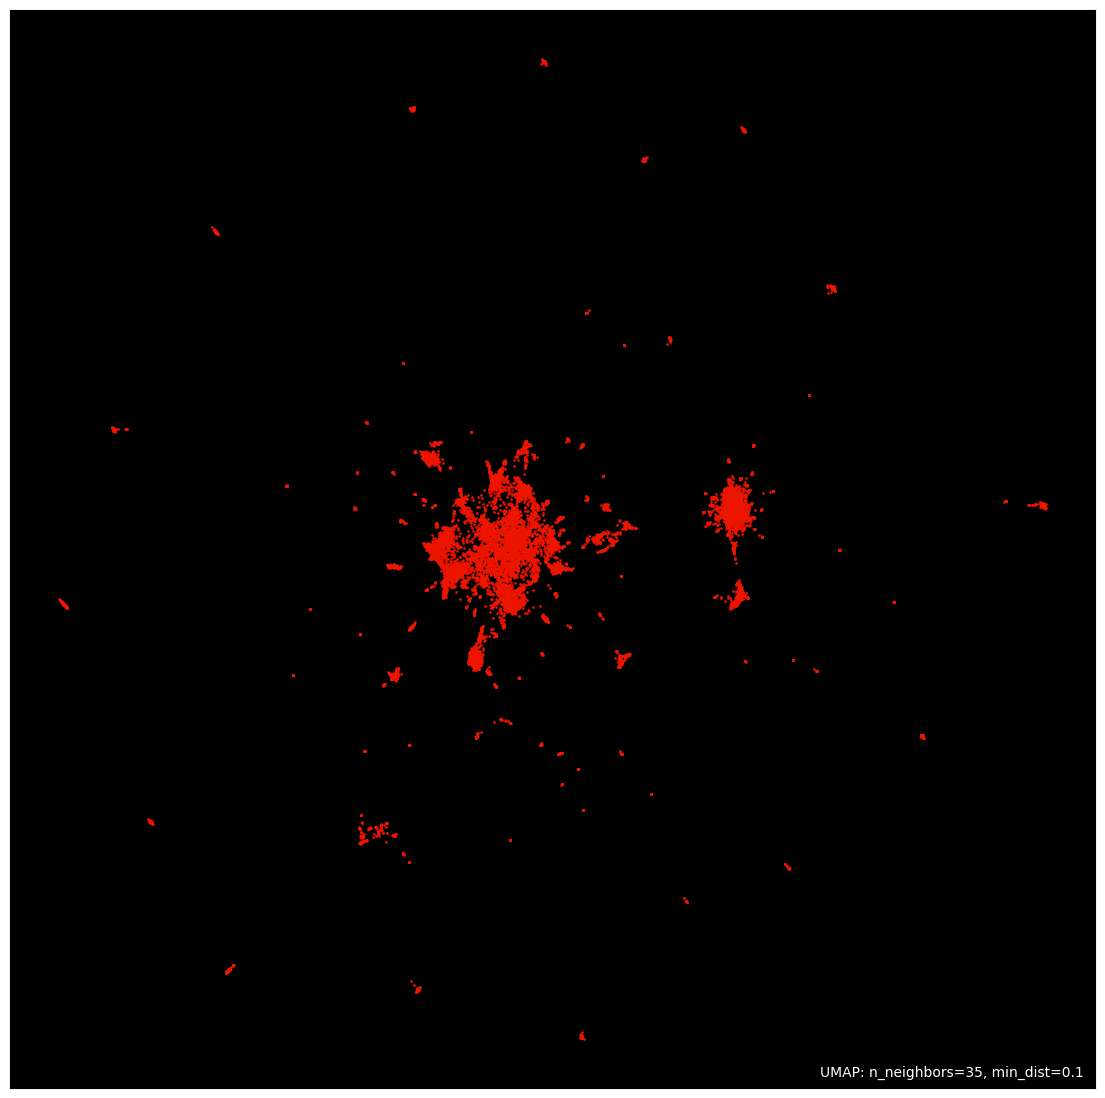

In [24]:
umap_obj = umap.UMAP(n_neighbors=35).fit(embeddings_2)
f = u_plot.points(umap_obj, height=1400, width=1400, theme="fire")
plt.savefig("drive/MyDrive/Res_15k.png")
#u_plot.plt.show()

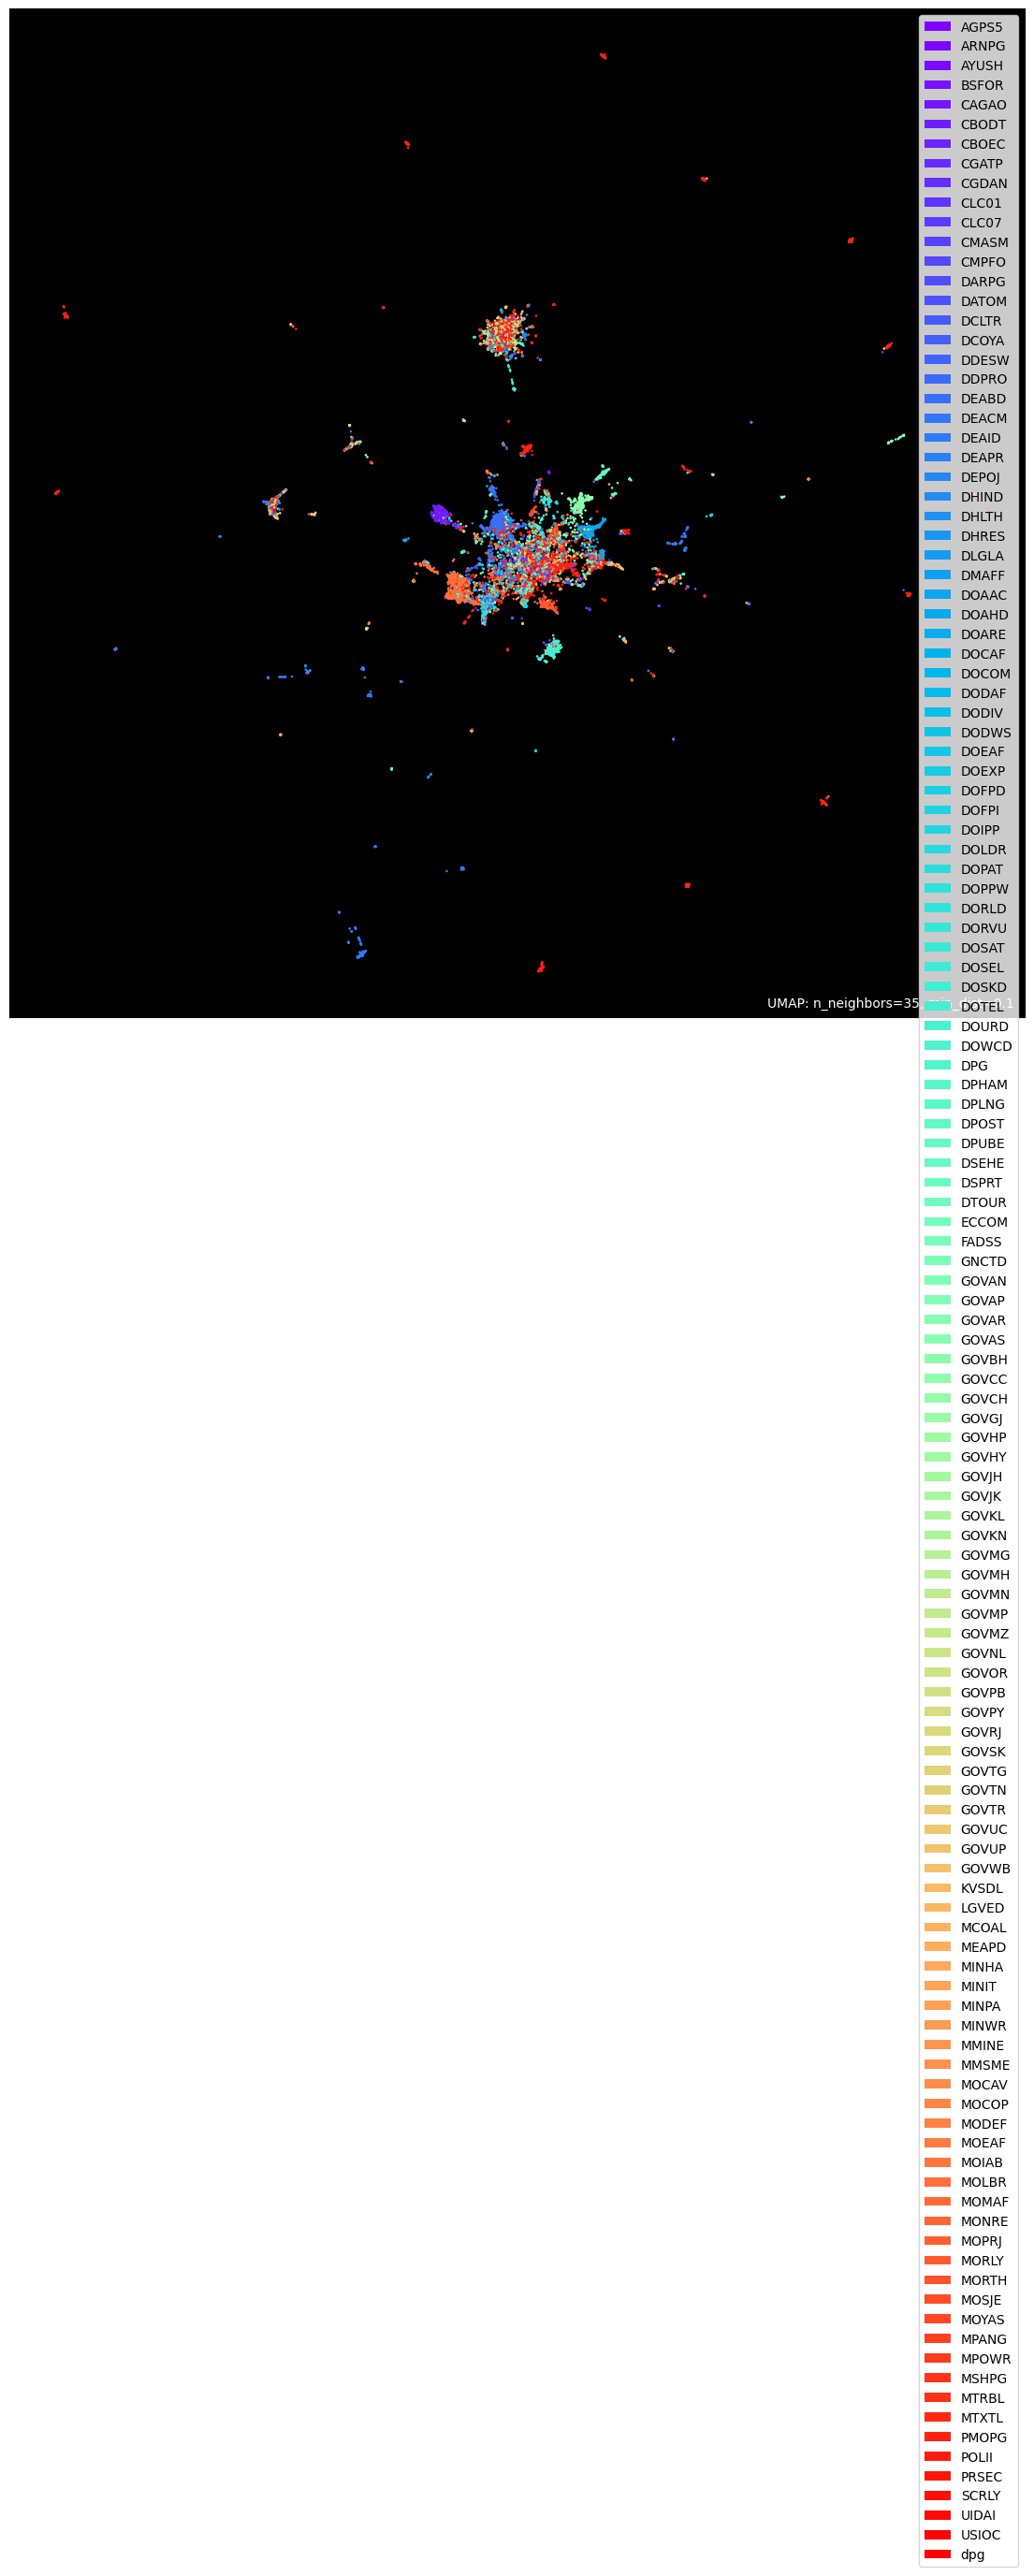

In [26]:
umap_obj = umap.UMAP(n_neighbors=35).fit(embeddings_2)
f = u_plot.points(umap_obj, labels=res_2.org, height=1400, width=1400, theme="fire")
plt.savefig("drive/MyDrive/Res_15k_org.png")

In [29]:
umap_obj = umap.UMAP(n_neighbors=35).fit(embeddings_2)
f = u_plot.points(umap_obj, labels=res_2.aggClustering_4500, height=960, width=960, theme="fire")
plt.savefig("drive/MyDrive/Res_15k_AggClustering_4500.png")

ValueError: Image size of 764x94281 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x960 with 1 Axes>

In [30]:
umap_obj = umap.UMAP(n_neighbors=35).fit(embeddings_2)
f = u_plot.points(umap_obj, labels=res_2.aggClustering_8700, height=960, width=960, theme="fire")
plt.savefig("drive/MyDrive/Res_15k_AggClustering_8700.png")

ValueError: Image size of 764x182247 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x960 with 1 Axes>